<a href="https://colab.research.google.com/github/jsedoc/ConceptorDebias/blob/master/Debias_BERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import torch
t = np.transpose
import matplotlib.pyplot as plt
%matplotlib inline

# Setup BERT

In [0]:
!pip install -q flair

In [0]:
from flair.embeddings import BertEmbeddings
from flair.data import Sentence


# init embedding
embedding = BertEmbeddings('bert-large-uncased')

# Get Brown Corpus

In [0]:
from tqdm import tqdm

import nltk
nltk.download('brown')

from nltk.corpus import brown
brown_corpus = brown.sents()

In [0]:
brown_e = []
for s in tqdm(brown_corpus[:20000]):
    sentence = Sentence(' '.join(s))
    embedding.embed(sentence)
    sent_emb = torch.stack([token.embedding for token in sentence]).numpy()
    brown_e.append(sent_emb)

In [0]:
import numpy as np
t = np.transpose
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
from   sklearn.decomposition import PCA
from   sklearn.manifold import TSNE, Isomap, LocallyLinearEmbedding, MDS, SpectralEmbedding
from   sklearn.preprocessing import StandardScaler

np.set_printoptions(suppress=True)
np.set_printoptions(precision=4)
plt_style = 'seaborn-talk'

# Experimental: HDBScan is a state-of-the-art clustering algorithm
hdbscan_available = True
try:
    import hdbscan
except ImportError:
    hdbscan_available = False

In [0]:
def do_plot(X_fit, title=None, labels=['']):
    dimension = X_fit.shape[1]
    label_types = sorted(list(set(labels)))
    num_labels = len(label_types)
    colors = cm.Accent(np.linspace(0, 1, num_labels))
    print(X_fit.shape, label_types, num_labels, colors)
    with plt.style.context(plt_style):
        fig = plt.figure()
        if dimension == 2:
            ax = fig.add_subplot(111)
            
            for lab, col in zip(label_types, colors):
                if num_labels>1:
                    idxs = [i for i,v in enumerate(labels) if v == lab]
                    ax.scatter([X_fit[i, 0] for i in idxs],
                               [X_fit[i, 1] for i in idxs],
                               c=col, label=lab)
                else:
                    ax.scatter(X_fit[:, 0],
                               X_fit[:, 1],
                               c=col)
        elif dimension == 3:
            ax = fig.add_subplot(111, projection='3d')
            for lab, col in zip(label_types, colors):
                ax.scatter(X_fit[labels==lab, 0],
                           X_fit[labels==lab, 1],
                           X_fit[labels==lab, 2],
                           c=col)
        else:
            raise Exception('Unknown dimension: %d' % dimension)
        plt.title(title)
        if num_labels>1:
            ax.legend()
        plt.show()

In [0]:
def pick_embeddings(corpus, sent_embs, word_list):
    X = []
    labels = []
    sents = []
    for i, s in enumerate(corpus):
        for j, w in enumerate(s):
            if w in word_list:
                X.append(sent_embs[i][j])
                labels.append(w)
                sents.append(s)
    return (X, labels, sents)

In [0]:
brown_corpus = brown_corpus[:20000]
brown_embs = brown_e

(386, 2) ['John', 'Mary', 'husband', 'wife'] 4 [[0.498  0.7882 0.498  1.    ]
 [0.9922 0.7529 0.5255 1.    ]
 [0.9412 0.0078 0.498  1.    ]
 [0.4    0.4    0.4    1.    ]]
2019-02-28 00:50:52,446 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
2019-02-28 00:50:52,464 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
2019-02-28 00:50:52,471 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D arra

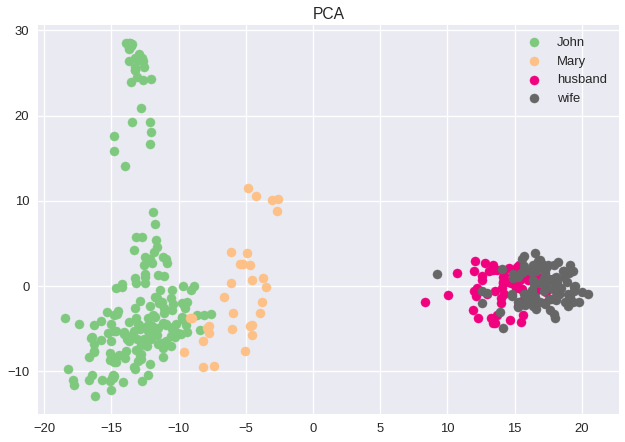

(389, 2) ['man', 'woman'] 2 [[0.498  0.7882 0.498  1.    ]
 [0.4    0.4    0.4    1.    ]]
2019-02-28 00:50:53,940 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
2019-02-28 00:50:53,952 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


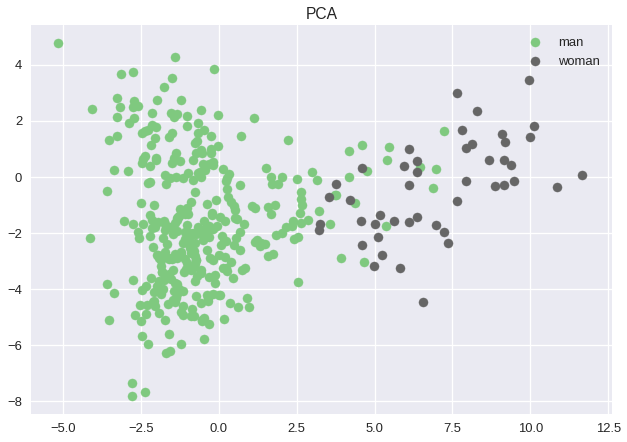

(167, 2) ['herself', 'himself'] 2 [[0.498  0.7882 0.498  1.    ]
 [0.4    0.4    0.4    1.    ]]
2019-02-28 00:50:55,603 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
2019-02-28 00:50:55,617 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


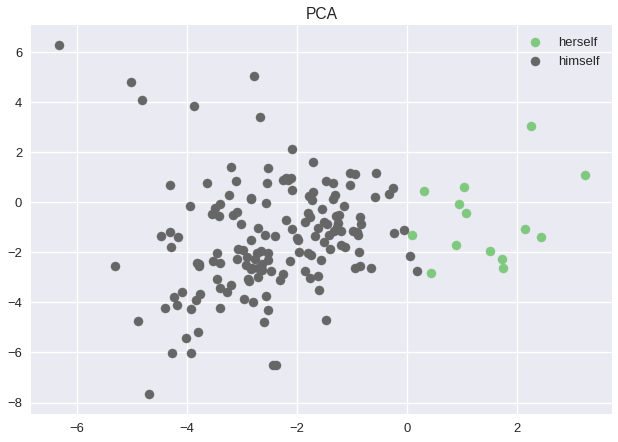

(114, 2) ['boy', 'girl'] 2 [[0.498  0.7882 0.498  1.    ]
 [0.4    0.4    0.4    1.    ]]
2019-02-28 00:50:57,075 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
2019-02-28 00:50:57,089 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


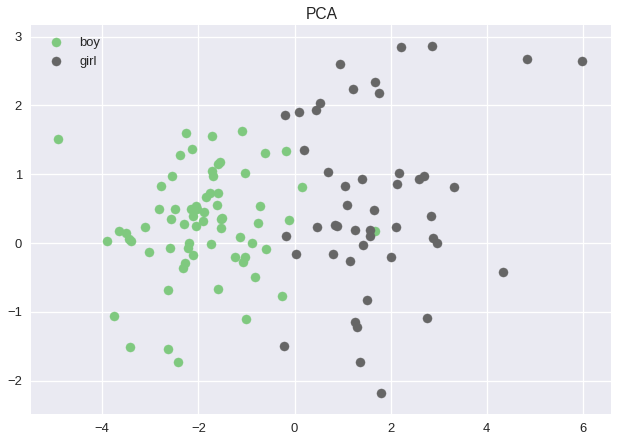

(222, 2) ['John', 'Mary'] 2 [[0.498  0.7882 0.498  1.    ]
 [0.4    0.4    0.4    1.    ]]
2019-02-28 00:50:58,567 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
2019-02-28 00:50:58,580 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


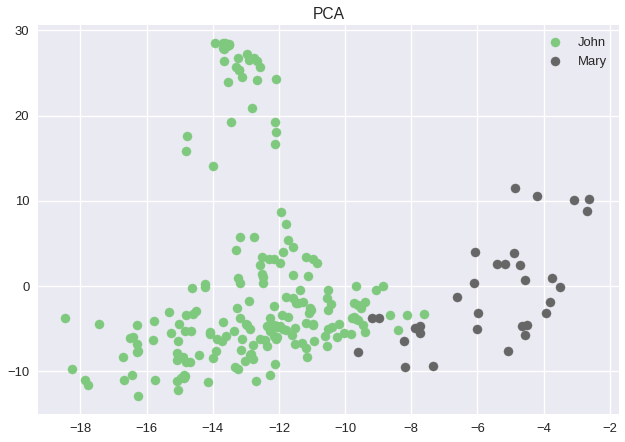

(164, 2) ['husband', 'wife'] 2 [[0.498  0.7882 0.498  1.    ]
 [0.4    0.4    0.4    1.    ]]
2019-02-28 00:51:00,070 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
2019-02-28 00:51:00,081 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


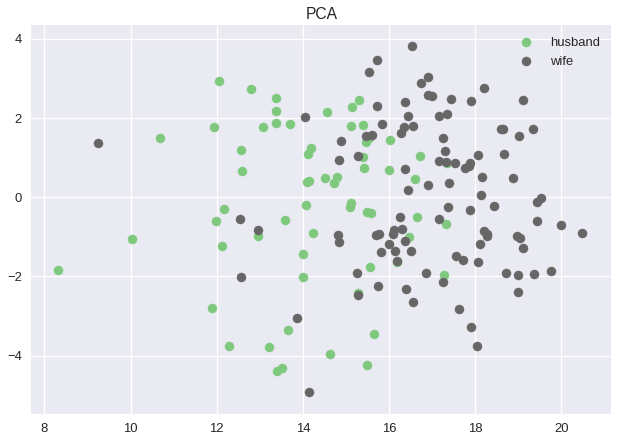

(87, 2) ['Bonnie', 'David', 'Robert'] 3 [[0.498  0.7882 0.498  1.    ]
 [0.2196 0.4235 0.6902 1.    ]
 [0.4    0.4    0.4    1.    ]]
2019-02-28 00:51:01,576 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
2019-02-28 00:51:01,587 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
2019-02-28 00:51:01,595 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want

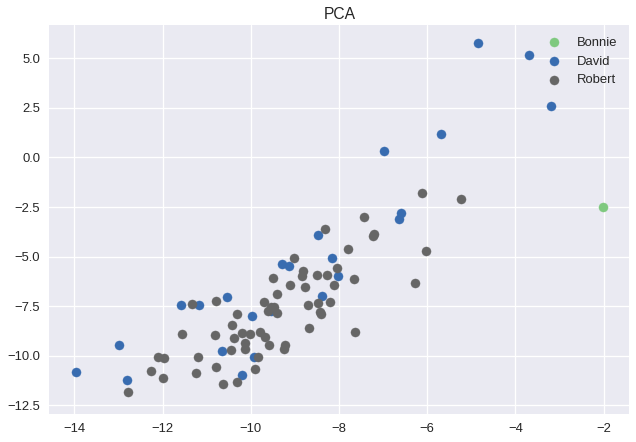

In [12]:
X, labels, _ = pick_embeddings(brown_corpus, brown_embs, ['husband', 'wife', 'Mary', 'John'])
pca = PCA(n_components=2)
pca.fit(X)
do_plot(pca.transform(X), 'PCA', labels=labels)
X, labels, _ = pick_embeddings(brown_corpus, brown_embs, ['man', 'woman'])
do_plot(pca.transform(X), 'PCA', labels=labels)
X, labels, _ = pick_embeddings(brown_corpus, brown_embs, ['himself', 'herself'])
do_plot(pca.transform(X), 'PCA', labels=labels)
X, labels, _ = pick_embeddings(brown_corpus, brown_embs, ['boy', 'girl'])
do_plot(pca.transform(X), 'PCA', labels=labels)
X, labels, _ = pick_embeddings(brown_corpus, brown_embs, ['Mary', 'John'])
do_plot(pca.transform(X), 'PCA', labels=labels)
X, labels, _ = pick_embeddings(brown_corpus, brown_embs, ['husband', 'wife'])
do_plot(pca.transform(X), 'PCA', labels=labels)
X, labels, _ = pick_embeddings(brown_corpus, brown_embs, ['David', 'Lauren', 'Robert', 'Bonnie'])
do_plot(pca.transform(X), 'PCA', labels=labels)

In [0]:
pickle.dump({'bert_bce':brown_embs},open( "bert_brown_corpus_20k.pkl", "wb" ))